In [93]:
library(RSQLite)
library(sqldf)
library(ggplot2)

In [ ]:
df = read.csv(file= "June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv")

<html><b>Which age group uses the dating app the most?</b></html>

In [124]:
q1 = sqldf("SELECT age_range AS [AgeGroup], count(*) as [Number_of_People_using_DatingApp] FROM 
(
select 
  case
   when AGE between 18 and 25 then '18-25'
   when AGE between 26 and 30 then '26-30'
   when AGE between 31 and 45 then '31-45'
   when AGE between 46 and 60 then '46-60'
   when AGE > 60 then '>60'
 END as age_range 
 from df
 where DATE1a = 1 or DATE2a = 1
) t
group by age_range
order by age_range")
q1

AgeGroup,Number_of_People_using_DatingApp
18-25,57
26-30,32
31-45,76
46-60,70
>60,37


<html><b>Plotting a pie chart to represent the information. The pie chart shows the different age groups and the number of people in that age group using the dating app.</b></html>

<html><b>Ans. As can be seen from the chart, the number of people in the age group 46-60 use the dating app the most.</b></html>

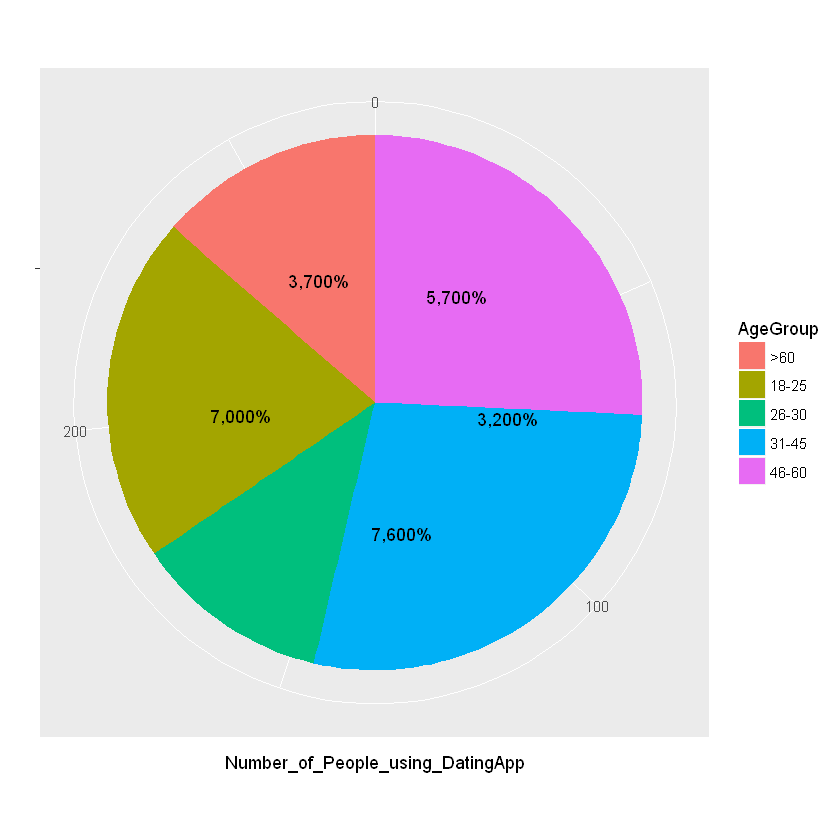

In [199]:
d <- data.frame(Number_of_People_using_DatingApp=c(q1$Number_of_People_using_DatingApp), AgeGroup=c(q1$AgeGroup))
value = q1$Number_of_People_using_DatingApp
# Barplot
bp<- ggplot(d, aes(x="", y=Number_of_People_using_DatingApp, fill=AgeGroup))+ geom_bar(width = 1, stat = "identity")
pie <- bp + coord_polar("y", start=0)
pie + xlab('') +  geom_text(aes(y=cumsum(value)-value/2, label=scales::percent(value)))


<html><b>How likely it is for married people to use the dating app? Which gender is more likely to use the dating app? </b></html>

In [205]:
q2 = sqldf("select SEX, MARITAL, count(*) AS [Number_of_People] 
            from df
            where MARITAL = 1 or MARITAL = 2 or MARITAL = 3 or MARITAL = 4 or MARITAL = 5
            group by SEX, MARITAL
            order by MARITAL")
q2

sex,marital,Number_of_People
1,1,532
2,1,507
1,2,69
2,2,58
1,3,73
2,3,104
1,4,23
2,4,27
1,5,48
2,5,128


<html><b>Plotting a sided by side bar chart. The x axis represents themarital status. The y axis represents the number of people using the dating app. The bar graph shows the difference in the number of married men and women who use the dating app.

Ans. It can be seen that the probablity of the professional job type tp exist in future is the most. And the probablity that government oficials will exist is very less.</b></html>

<html><b>Ans. As can be seen, a very high number of married men and women use the dating app. Widowed women are more likely to use the dating app as compared to the men. </b></html>

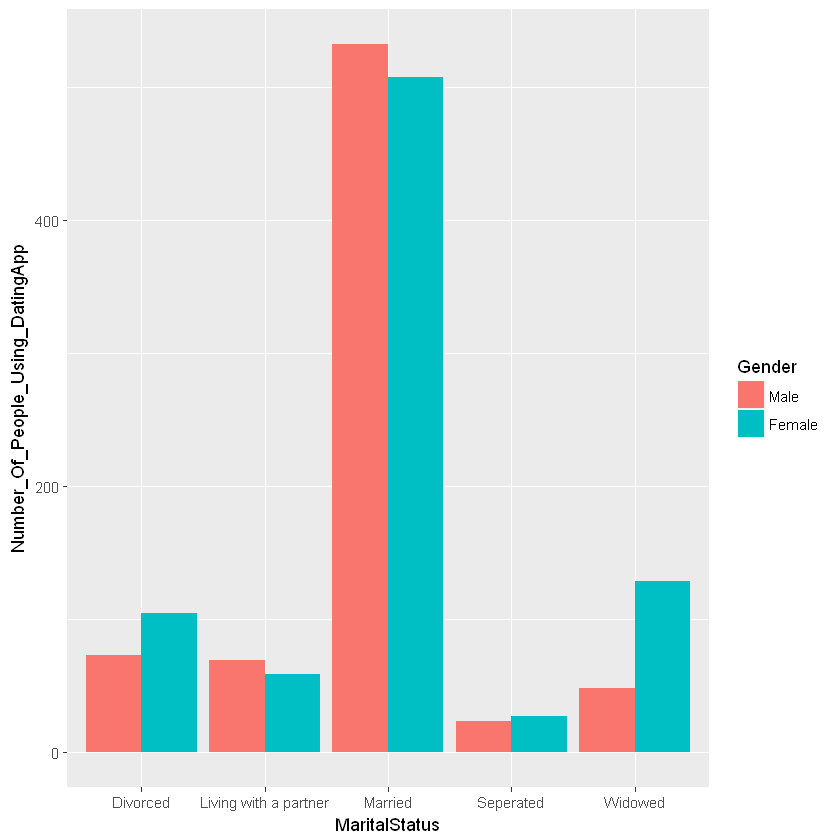

In [206]:
column1 <- c(rep("Married", 2), rep("Living with a partner", 2), rep("Divorced", 2), rep("Seperated", 2), rep("Widowed", 2))
column2 <- gl(2, 1, 10, labels=c("Male", "Female"))
column3 <- c(q2$Number_of_People)

d <- data.frame(MaritalStatus=column1, Gender=column2, Number_Of_People_Using_DatingApp=column3)

require(ggplot2)
ggplot(d, aes(x=MaritalStatus, y=Number_Of_People_Using_DatingApp, fill=Gender)) + geom_bar(stat="identity", position=position_dodge())

<html><b>What is number of people doing manual or physical work depending on gender?Are men more likely to do physical work? Or men and women both do equal amount of physical work nowadays?</b></html>

In [162]:
q3 = sqldf("select SEX, EMPTYPE2 as [Employment_Type], count(*) as [Number_of_people_doing_manual_or_physical_labour_depending_on_gender]
            FROM df
            where EMPTYPE2 = 1 or EMPTYPE2 = 2
            group by SEX, EMPTYPE2
            ORDER BY Employment_Type")
q3

sex,Employment_Type,Number_of_people_doing_manual_or_physical_labour_depending_on_gender
1,1,284
2,1,162
1,2,339
2,2,313


<html><b>Plotting a sided by side bar chart. The x axis represents the type of work people do. The y axis represents the number of people doing which type of work. The bar graph shows the differencein the number of men and women doing what type of work</b></html>

<html><b>Ans. As can be seen from the graph, men are more likely to do physical work as compared to women. But almost equal number of both men and women do non physical work </b></html>

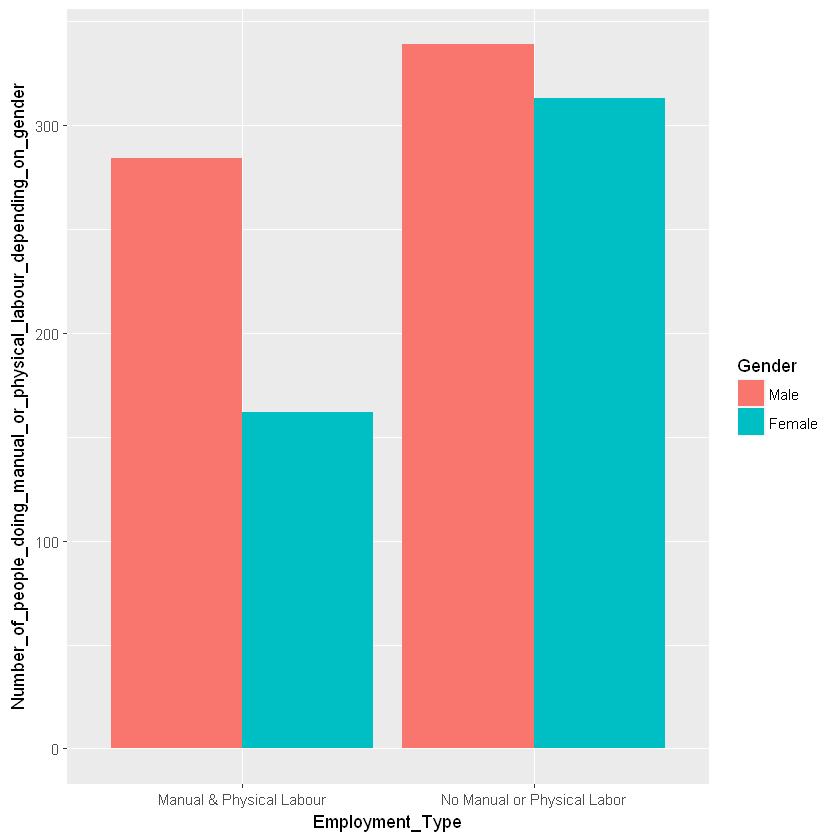

In [163]:
column1 <- c(rep("Manual & Physical Labour", 2), rep("No Manual or Physical Labor", 2))
column2 <- gl(2, 1, 4, labels=c("Male", "Female"))
column3 <- c(q3$Number_of_people_doing_manual_or_physical_labour_depending_on_gender)

d <- data.frame(Employment_Type=column1, Gender=column2, Number_of_people_doing_manual_or_physical_labour_depending_on_gender=column3)

require(ggplot2)
ggplot(d, aes(x=Employment_Type, y=Number_of_people_doing_manual_or_physical_labour_depending_on_gender, fill=Gender)) + geom_bar(stat="identity", position=position_dodge())

<html><b>What is the frequency of the job types in terms of its future existence. How likely is a professional employment type liable to exist in future? And what about other job types as well? </b></html>

In [181]:
q4 = sqldf("select EMPTYPE3 AS [Employment_Type], AUTO2 as [Future_of_Occupation], count(*) AS frequency from df where 
            (EMPTYPE3 <> 9 AND EMPTYPE3 <> 6 AND EMPTYPE3 <> 8) and ((AUTO2 <> 8) AND (AUTO2<>9)) and AUTO2<>3
            group by EMPTYPE3, AUTO2
            order by [Future_of_Occupation] asc")
q4

Employment_Type,Future_of_Occupation,frequency
1,1,118
2,1,25
3,1,5
4,1,14
5,1,28
1,2,166
2,2,60
3,2,3
4,2,32
5,2,37


<html><b>Plotting a sided by side bar chart. The x axis represents the future of occupation. The y axis represents the number of the types of occupation representing its future. The bar graph shows the difference in the the future of the different types of job types.

Ans. It can be seen that the probablity of the professional job type tp exist in future is the most. And the probablity that government oficials will exist is very less.</b></html>

<html><b>

Ans. It can be seen that the probablity of the professional job type tp exist in future is the most. And the probablity that government oficials will exist is very less.</b></html>

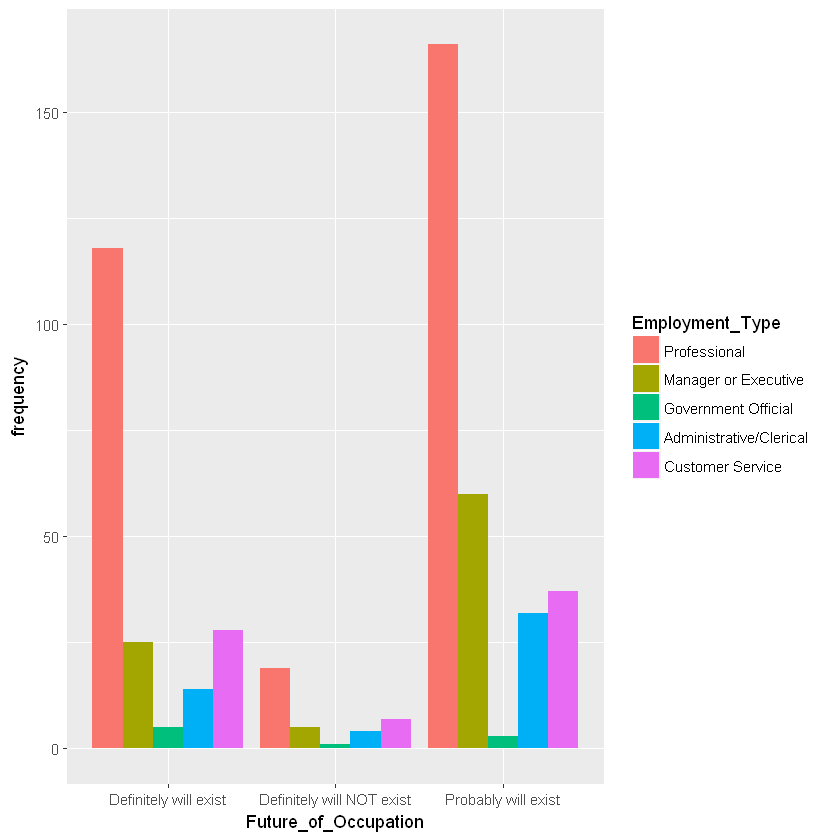

In [185]:
column1 <- c(rep("Definitely will exist", 5), rep("Probably will exist", 5), rep("Definitely will NOT exist", 5))
column2 <- gl(5, 1, 15, labels=c("Professional", "Manager or Executive", "Government Official", "Administrative/Clerical", "Customer Service"))
column3 <- c(q4$frequency)

d <- data.frame(Future_of_Occupation=column1, Employment_Type=column2, frequency=column3)

require(ggplot2)
ggplot(d, aes(x=Future_of_Occupation, y=frequency, fill=Employment_Type)) + geom_bar(stat="identity", position=position_dodge())

<html><b>Which job type receives what type of income?</b></html>

In [189]:
q5 = sqldf("select EMPTYPE3 as [Employment_Type], INC as Income, count(*) as frequency from df
            where ((EMPTYPE3 =1 or EMPTYPE3 =2 or EMPTYPE3 =3 or EMPTYPE3 =4 or EMPTYPE3 =5) and ( (INC != 99) ) ) and (INC != 98) and INC<>2 and INC <> 3 and INC <> 4
            group by EMPTYPE3, INC
            order by INC")
q5

Employment_Type,Income,frequency
1,1,5
2,1,2
3,1,1
4,1,2
5,1,5
1,5,26
2,5,3
3,5,1
4,5,7
5,5,13


<html><b>Plotting a sided by side bar chart. The x axis represents the income of people. The y axis represents the number of people belonging to a particular job type in a partcular income range.
Ans. We can clearly see that professional people people generally get salary in the range 100-150K$. The same can be seen for other employment types as well. </b></html>

<html><b>Ans. We can clearly see that professional people people generally get salary in the range 100-150K$. The same can be seen for other employment types as well. </b></html>

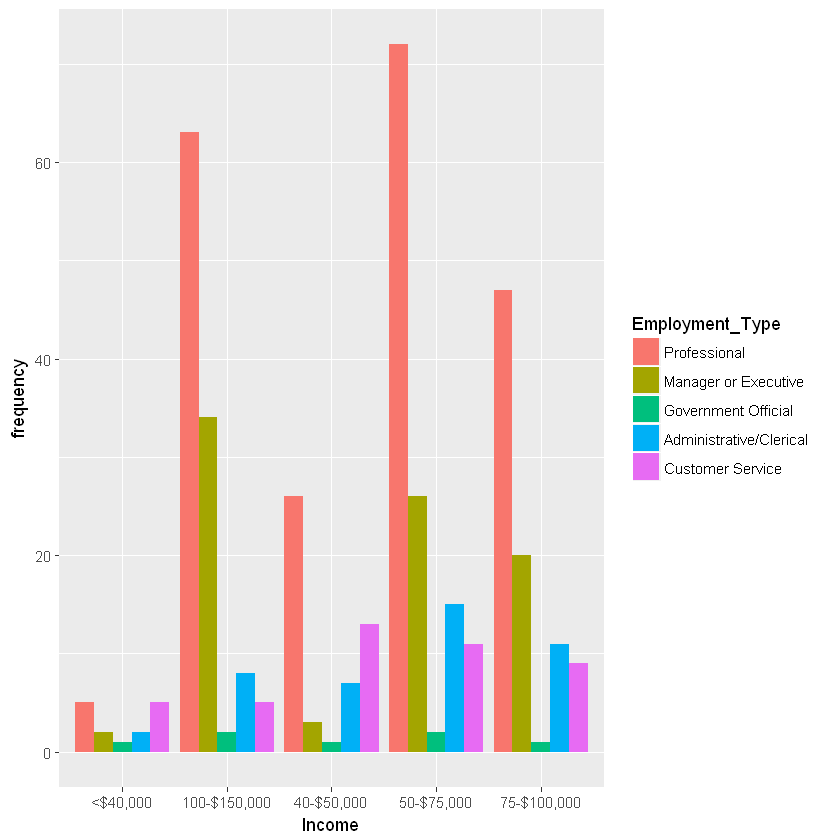

In [192]:
column1 <- c(rep("<$40,000", 5), rep("40-$50,000", 5), rep("50-$75,000", 5), rep("75-$100,000", 5),rep("100-$150,000", 5),rep("50-$75,000", 5))
column2 <- gl(5, 1, 30, labels=c("Professional", "Manager or Executive", "Government Official", "Administrative/Clerical", "Customer Service"))
column3 <- c(q5$frequency)

d <- data.frame(Income=column1, Employment_Type=column2, frequency=column3)

require(ggplot2)
ggplot(d, aes(x=Income, y=frequency, fill=Employment_Type)) + geom_bar(stat="identity", position=position_dodge())